# Importing Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [42]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [43]:
data = pd.read_csv('spambase_csv.csv')

# Data Preparation

In [44]:
data.shape

(4601, 58)

In [45]:
print(data.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [46]:
print(data.isnull().sum())

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [47]:
data.duplicated().sum()

391

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [49]:
print(data.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

# Data Analysis

In [50]:
data.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


<Axes: >

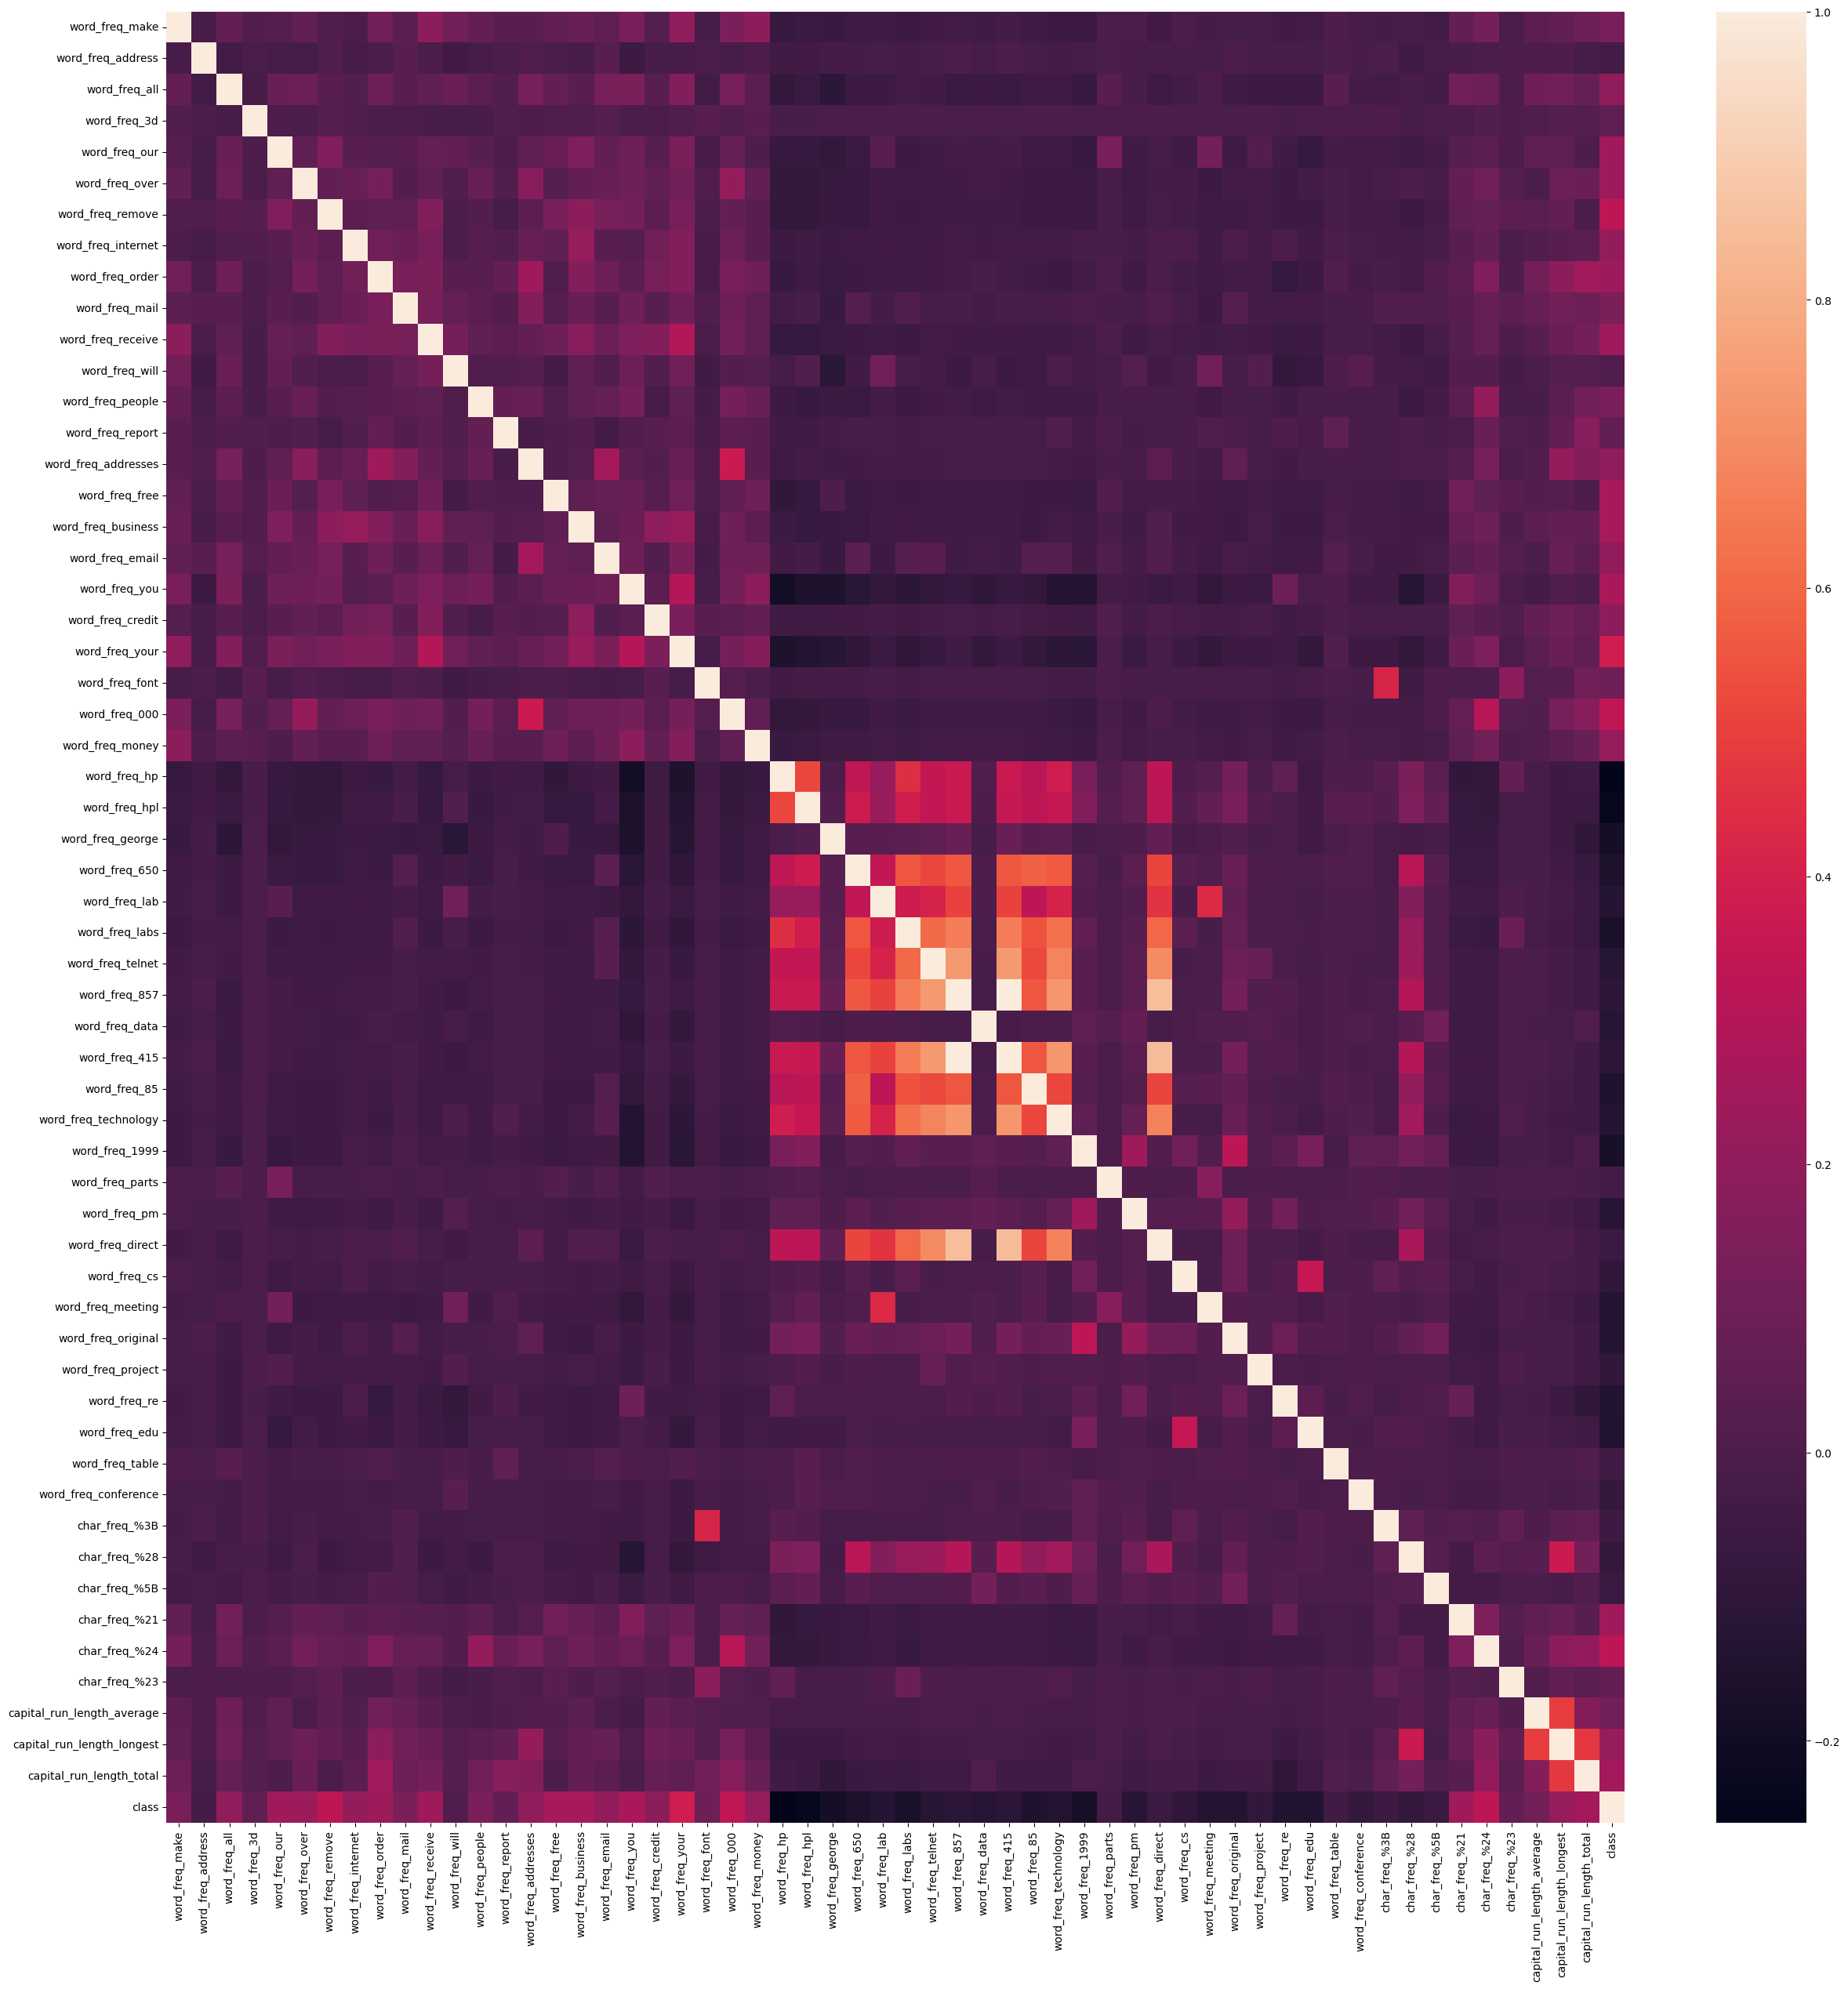

In [51]:
plt.figure(figsize = (30,30))
sns.heatmap(data.corr())

The heat map above overcrowded and not so understandable.

In [52]:
correlation = abs(data.corr()["class"].sort_index()).reset_index().rename(columns= {"index":"feature"})
correlation.sort_values("class", ascending = False)

,feature,class
9,class,1.000000
57,word_freq_your,0.383234
10,word_freq_000,0.334787
50,word_freq_remove,0.332117
5,char_freq_%24,0.323629
56,word_freq_you,0.273651
29,word_freq_free,0.263215
20,word_freq_business,0.263204
31,word_freq_hp,0.256723
2,capital_run_length_total,0.249164


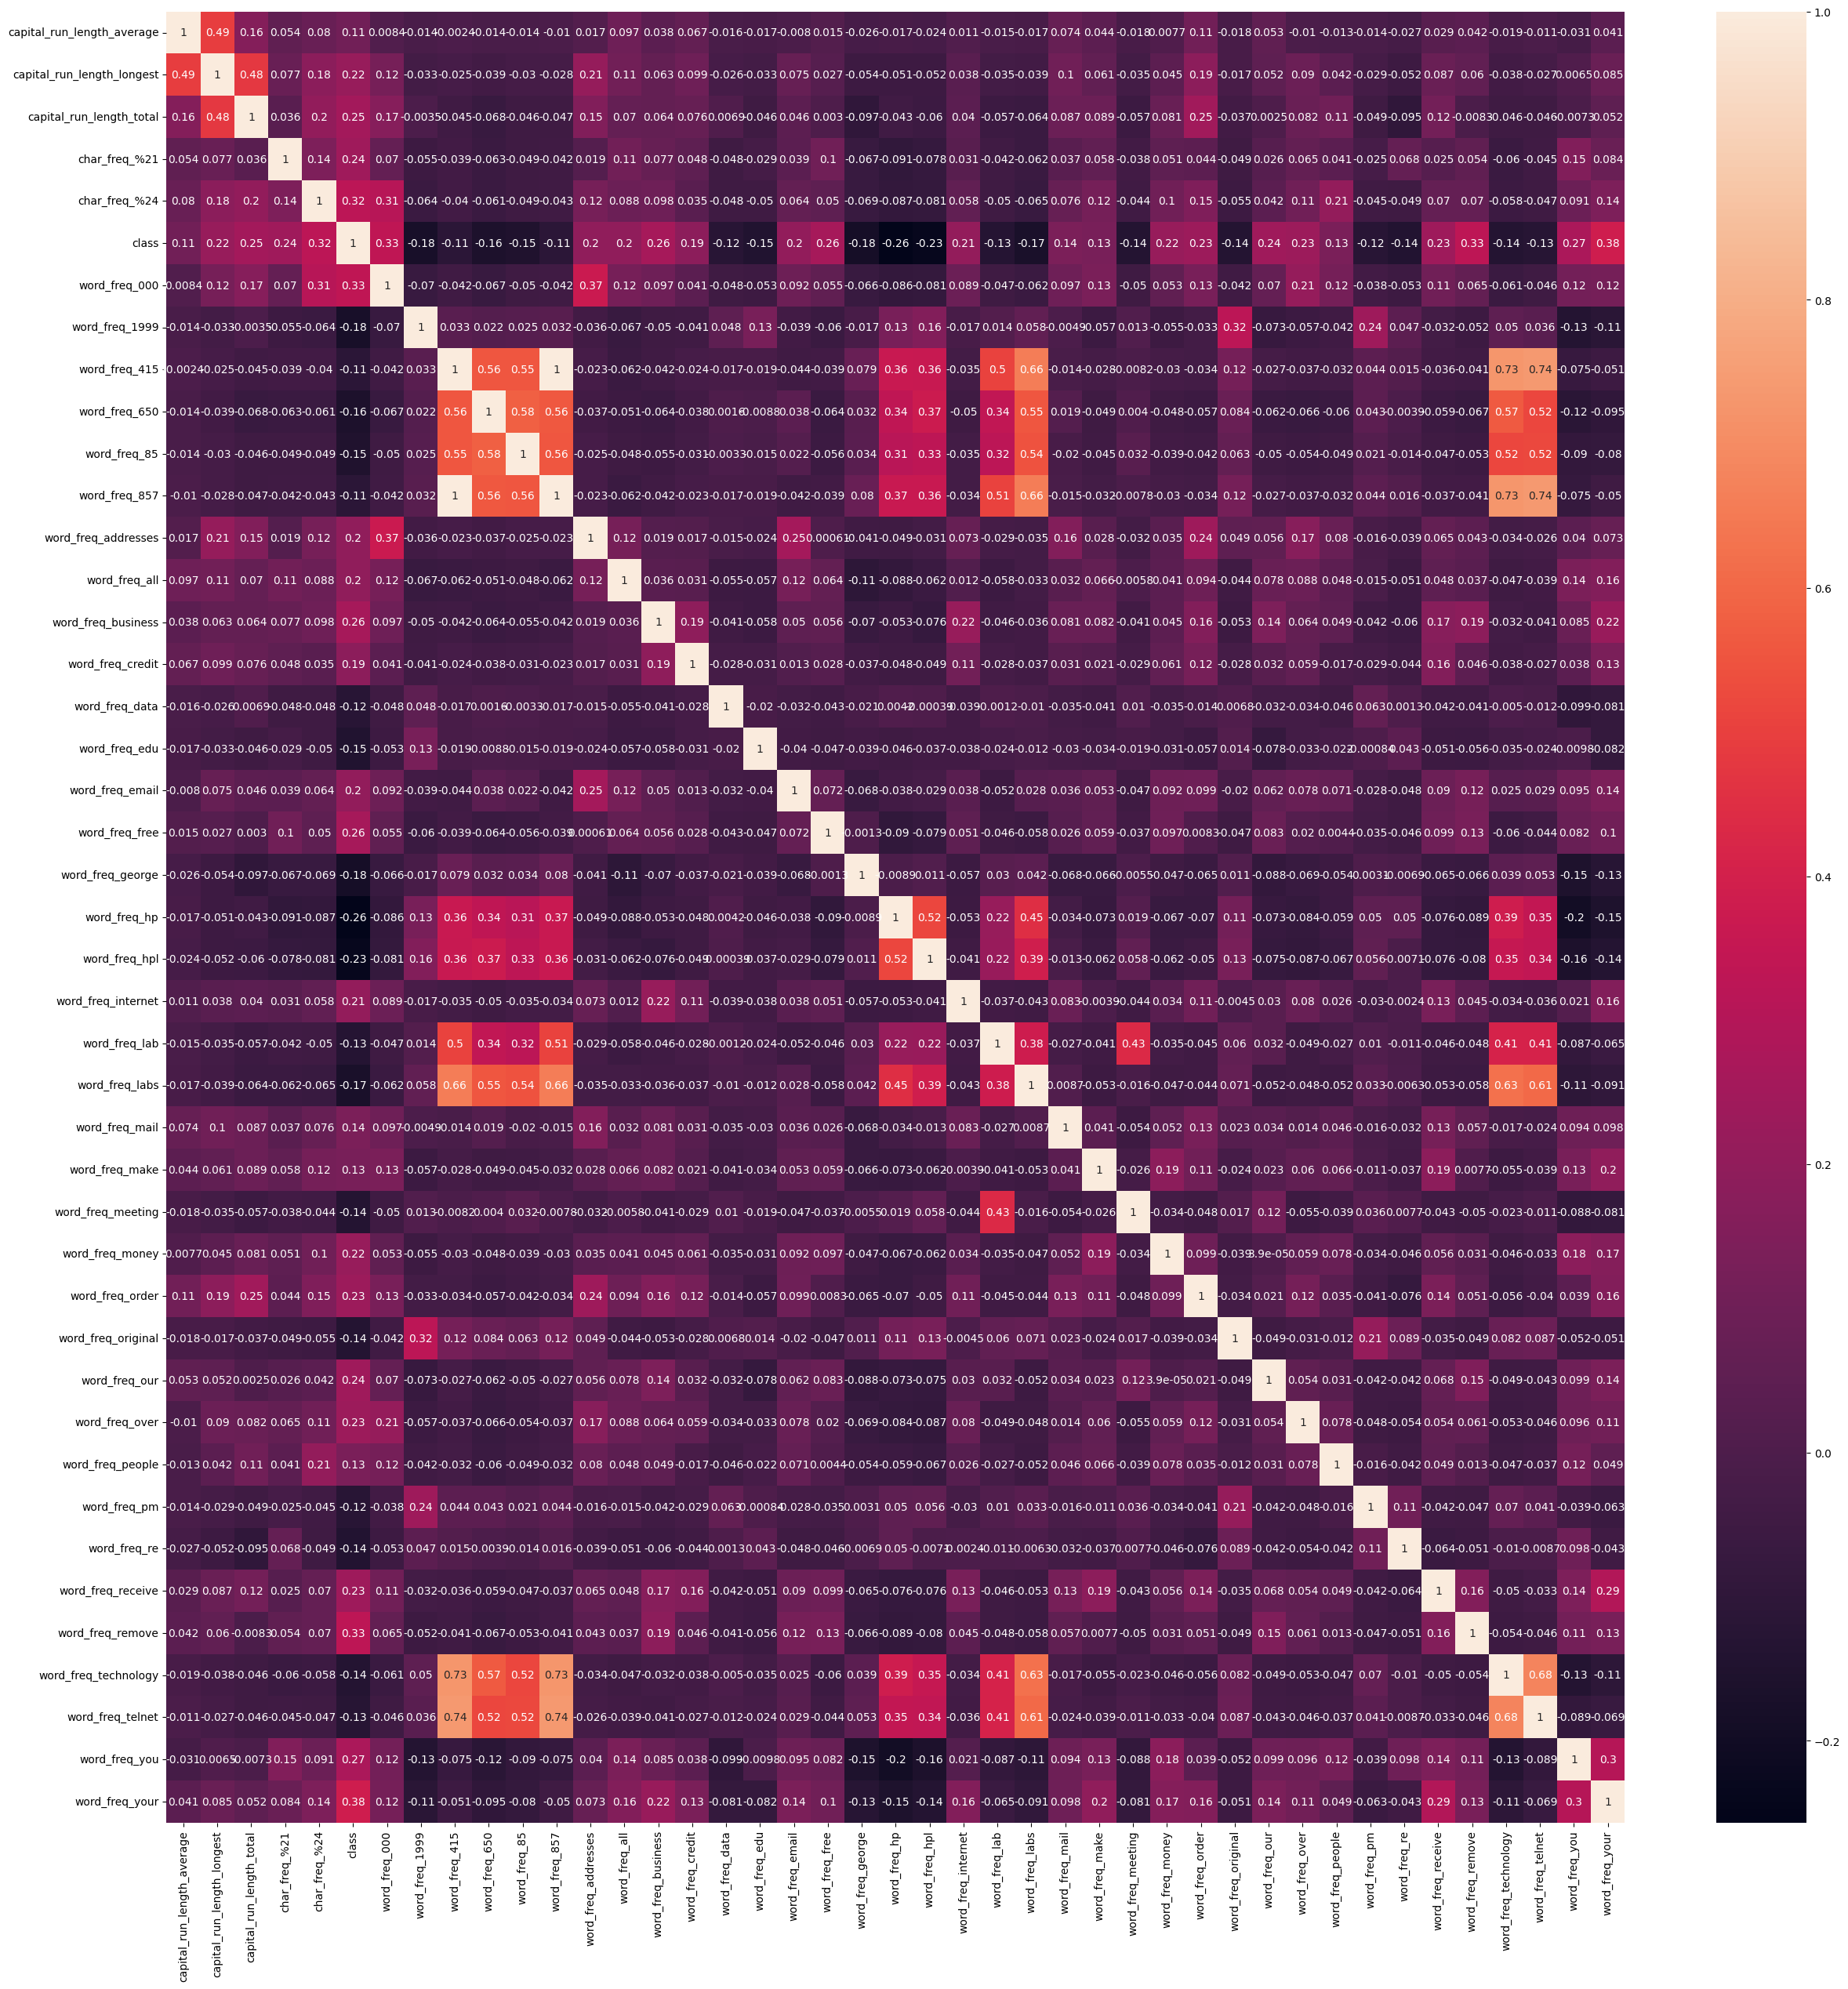

In [53]:
estimated_features = correlation[correlation["class"] > 0.097375].feature.to_list()
plt.figure(figsize = (30,30))
sns.heatmap(data[estimated_features].corr(), annot = True)
plt.show ()

# Evaluator Function

In [54]:
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    return accuracy, precision, recall, f1, roc_auc, cm

# Plot Confussion Matrix Function

In [55]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Splitting Dataset

In [56]:
X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models

## Random Forest

In [57]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Training Accuracy: ", rf.score(X_train, y_train))
print("Test Accuracy: ", rf.score(X_test, y_test))

Training Accuracy:  0.9996894409937889
Test Accuracy:  0.9558291093410572


### Random Forest Evaluation

In [58]:
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc, rf_cm = evaluate_model(rf_preds, y_test)
print("Random Forest Evaluation")
print("Accuracy: ", rf_accuracy)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)
print("ROC AUC Score: ", rf_roc_auc)
print("Confusion Matrix: ", rf_cm)

Random Forest Evaluation
Accuracy:  0.9558291093410572
Precision:  0.9582542694497154
Recall:  0.9283088235294118
F1 Score:  0.9430438842203548
ROC AUC Score:  0.9510122373322089
Confusion Matrix:  [[815  22]
 [ 39 505]]


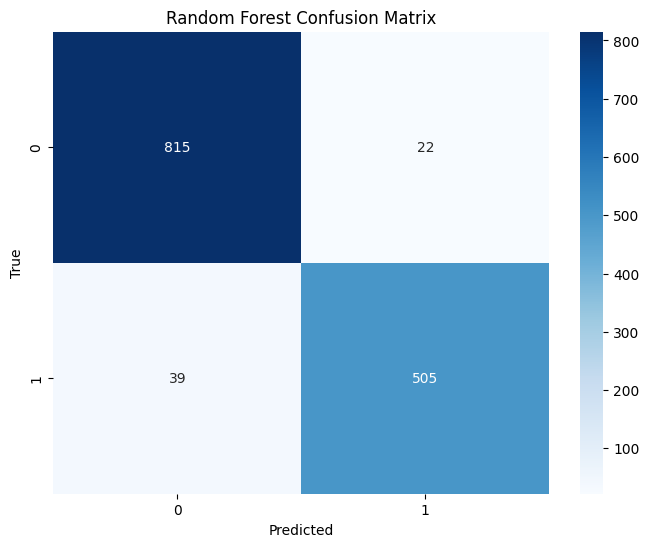

In [59]:
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")

## Decision Tree

In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

print("Training Accuracy: ", dt.score(X_train, y_train))
print("Test Accuracy: ", dt.score(X_test, y_test))

Training Accuracy:  0.9996894409937889
Test Accuracy:  0.8921071687183201


### Decision Tree Evaluation

In [61]:
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc, dt_cm = evaluate_model(dt_preds, y_test)
print("Decision Tree Evaluation")
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1 Score: ", dt_f1)
print("ROC AUC Score: ", dt_roc_auc)
print("Confusion Matrix: ", dt_cm)

Decision Tree Evaluation
Accuracy:  0.8921071687183201
Precision:  0.8483245149911817
Recall:  0.8841911764705882
F1 Score:  0.8658865886588659
ROC AUC Score:  0.8907216336355331
Confusion Matrix:  [[751  86]
 [ 63 481]]


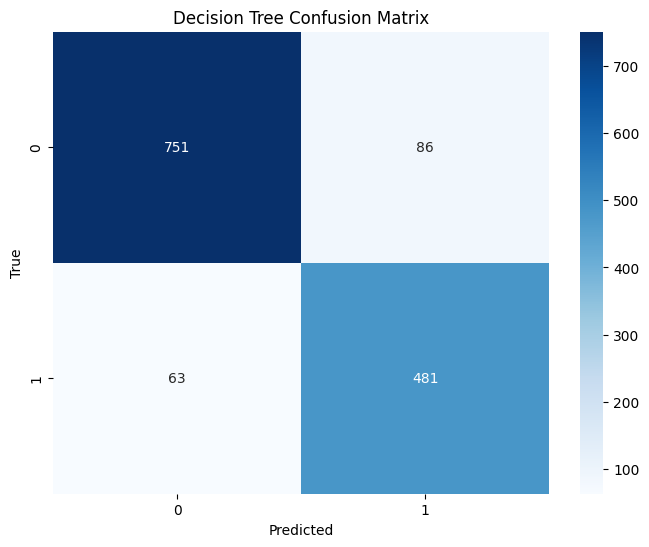

In [62]:
plot_confusion_matrix(dt_cm, "Decision Tree Confusion Matrix")

In [63]:
rf_preds_all = rf.predict(X)
dt_preds_all = dt.predict(X)


In [64]:
results = X_test.copy()
results['Actual'] = y_test
results['RandomForestPrediction'] = rf_preds
results['DecisionTreePrediction'] = dt_preds

In [65]:
results.to_csv('spam_classification_results.csv', index=False)

In [66]:
spam_classification = pd.DataFrame({
    'Line': results.index,
    'Actual': y_test,
    'RandomForestPrediction': rf_preds,
    'DecisionTreePrediction': dt_preds
})

spam_classification.to_csv('spam_classification_results.csv', index=False)